In [19]:
import numpy as np

def f(x):
    # Funksjonen
    return np.sin(x**2)

a = 0.5
b = 1.5      # Grenser
N = 20       # Rektangel
dx = (b-a)/N # Breidde
integral = 0

for n in range(1, N+1):
  x = a+(n-0.5)*dx            # Oppdaterar x
  integral = integral+f(x)*dx # Legg til areal

print(integral)        # Skriv svar til skjerm

0.7370540535373423


In [1]:
"""Implementering som estimerer eit integral på tre måtar:
Venstre og høgre Riemann-sum og trapesmetoden.
"""

# Talet på rektangel
n = int(input('Kor mange rektangel? '))

def funk(x):
    """Funksjonen"""
    return x**3

# Grenser
a = 1
b = 3

# Bestemmer h og initierer summane V og H
h = (b-a)/n
V = 0
H = 0

# Reknar ut venstresummen
for i in range(0, n):
    xi = a+i*h
    V = V+h*funk(xi)

# Reknar ut høgresummen
for i in range(1, n+1):
    xi = a+i*h
    H = H+h*funk(xi)

# Skriv summane V, H og T til skjerm
print(f'V = {V:.4f}')
print(f'H = {H:.4f}')
T=(V+H)/2            # Trapessummen
print(f'T = {T:.4f}')

Kor mange rektangel?  100


V = 19.7408
H = 20.2608
T = 20.0008


In [11]:
def riemann_funk_V(funk, a, b, N):
    """Funksjonsfil som estimerar eit integral
    
    som ein Riemann-sum på ein regulær partisjon med venstre-
    seleksjon.
    Integranden og grenser er hard-koda, input er
    N, talet på del-intervall.
    """
    
    # Oppdeling
    delta_x = (b-a)/N
    
    # Initerar summen:
    R = 0
    
    # Reknar ut summen
    for n in range(1, N+1):
        x = a+(n-1)*delta_x             # Oppdaterar x
        R = R+delta_x*funk(x)           # Oppdaterar summen

    return R

def riemann_funk_M(funk, a, b, N):
    """Funksjonsfil som estimerar eit integral
    
    som ein Riemann-sum på ein regulær partisjon med midt-
    seleksjon.
    Integranden og grenser er hard-koda, input er
    N, talet på del-intervall.
    """
    
    # Oppdeling
    delta_x = (b-a)/N
    
    # Initerar summen:
    R = 0
    
    # Reknar ut summen
    for n in range(1, N+1):
        x = a+(n-0.5)*delta_x           # Oppdaterar x
        R = R+delta_x*funk(x)           # Oppdaterar summen

    return R

def riemann_funk_H(funk, a, b, N):
    """Funksjonsfil som estimerar eit integral
    
    som ein Riemann-sum på ein regulær partisjon med høgre-
    seleksjon.
    Integranden og grenser er hard-koda, input er
    N, talet på del-intervall.
    """
    
    # Oppdeling
    delta_x = (b-a)/N
    
    # Initerar summen:
    R = 0
    
    # Reknar ut summen
    for n in range(1, N+1):
        x = a+n*delta_x                 # Oppdaterar x
        R = R+delta_x*funk(x)           # Oppdaterar summen

    return R

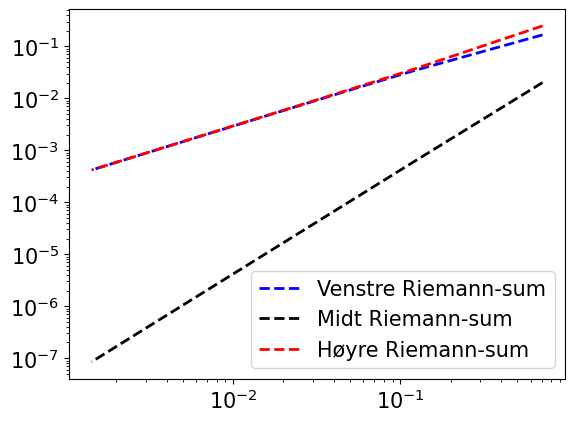

In [12]:
"""Implementering som plottar feilen i eit estimat
for ein Riemann-sum, trapesmetoden og Simpsons metode.
"""

import numpy as np
import matplotlib.pyplot as plt

def funk(x):
    """Integrand"""
    return np.sqrt(4-x**2)

a = 0
b = np.sqrt(2)
fasit = 1 + np.pi*0.5

# Lagar vektor med n-verdiar
n_start = 2
n_steg = 10
n_slutt = 1000
n_vektor = np.arange(n_start, n_slutt+1, n_steg)
h_vektor = (b-a)/n_vektor

V_vektor = np.zeros_like(h_vektor)
M_vektor = np.zeros_like(h_vektor)
H_vektor = np.zeros_like(h_vektor)

# Lagar vektorar med estimat
indeks = 0
for n in n_vektor:
    V_vektor[indeks] = riemann_funk_V(funk, a, b, n)
    M_vektor[indeks] = riemann_funk_M(funk, a, b, n)
    H_vektor[indeks] = riemann_funk_H(funk, a, b, n)
    indeks = indeks+1

# Plottar feilen
plt.rcParams.update({'font.size': 15})
plt.loglog(h_vektor, abs(V_vektor-fasit), 'b--', linewidth=2, 
           label='Venstre Riemann-sum')
plt.loglog(h_vektor, abs(M_vektor-fasit), 'k--', linewidth=2,
           label='Midt Riemann-sum')
plt.loglog(h_vektor, abs(H_vektor-fasit), 'r--', linewidth=2,
           label='Høyre Riemann-sum')

plt.legend(loc='lower right')
plt.show()